# Introduction

Japan Exchange Group, Inc. (株式会社日本取引所グループ, Kabushiki-gaisha Nippon Torihikijo Gurūpu) , abbreviated as JPX or Nippon Torihikijo, is a Japanese financial services corporation regulated by the Financial Instruments and Exchange Act. JPX owns and operates the Tokyo Stock Exchange (TSE), the Osaka Exchange (OSE), and the Tokyo Commodity Exchange (TOCOM).



## Setup and Import

As always, the first step is to import the required libraries and data. Since we do not want to run the SQL query every time, we can simply import the csv file we created in the first notebook.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import numpy as np


In [70]:
# Import dataframe
df = pd.read_csv("kaggle_survey.csv")

## Getting to Know the Data

Before you can start visualizing, you should get an overview of the data. Is the format of the data suitable for visualization or do you need to adjust something here and there?

In [3]:
# Examine the usual suspects: head, tail, unique values etc. 
df.head()

,id,age_range,gender,county_residence,highest_education,latest_job_role,years_of_programming,programming_language_recommended,computing_platforms,times_tpu_used,years_of_experience,size_of_company,number_of_data_scientists,employer_incorporate_ml,yearly_earnings,money_spend_on_cloud,most_used_data_products,most_used_bi_tool,primary_tool_data_analysis
0,7232,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
1,7233,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999","$100,000 or more ($USD)",PostgresSQL,Microsoft Power BI,"Business intelligence software (Salesforce, Ta..."
2,7234,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods),"15,000-19,999",$0 ($USD),NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
3,7235,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999","$10,000-$99,999",MySQL,NaN,"Local development environments (RStudio, Jupyt..."
4,7236,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,id,age_range,gender,county_residence,highest_education,latest_job_role,years_of_programming,programming_language_recommended,computing_platforms,times_tpu_used,years_of_experience,size_of_company,number_of_data_scientists,employer_incorporate_ml,yearly_earnings,money_spend_on_cloud,most_used_data_products,most_used_bi_tool,primary_tool_data_analysis
20031,27263,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20032,27264,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,A personal computer or laptop,Never,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
20033,27265,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,A personal computer or laptop,Never,I do not use machine learning methods,0-49 employees,0,We are exploring ML methods (and may one day p...,$0-999,$0 ($USD),NaN,NaN,NaN
20034,27266,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,1-2 years,"10,000 or more employees",20+,"We recently started using ML methods (i.e., mo...",$0-999,$0 ($USD),NaN,NaN,"Local development environments (RStudio, Jupyt..."
20035,27267,22-24,Man,Pakistan,Master’s degree,Machine Learning Engineer,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Once,Under 1 year,0-49 employees,0,I do not know,$0-999,$0 ($USD),NaN,NaN,"Local development environments (RStudio, Jupyt..."


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                20036 non-null  int64 
 1   age_range                         20036 non-null  object
 2   gender                            20036 non-null  object
 3   county_residence                  20036 non-null  object
 4   highest_education                 19569 non-null  object
 5   latest_job_role                   19277 non-null  object
 6   years_of_programming              19120 non-null  object
 7   programming_language_recommended  17821 non-null  object
 8   computing_platforms               17029 non-null  object
 9   times_tpu_used                    16780 non-null  object
 10  years_of_experience               16374 non-null  object
 11  size_of_company                   11403 non-null  object
 12  number_of_data_sci

In [8]:
df.describe()

,id
count,20036.000000
mean,17249.500000
std,5784.039333
min,7232.000000
25%,12240.750000
50%,17249.500000
75%,22258.250000
max,27267.000000


In [9]:
df.nunique()

id                                  20036
age_range                              11
gender                                  5
county_residence                       55
highest_education                       7
latest_job_role                        13
years_of_programming                    7
programming_language_recommended       13
computing_platforms                     5
times_tpu_used                          5
years_of_experience                     9
size_of_company                         5
number_of_data_scientists               7
employer_incorporate_ml                 6
yearly_earnings                        25
money_spend_on_cloud                    6
most_used_data_products                17
most_used_bi_tool                      14
primary_tool_data_analysis              6
dtype: int64

## Visualisations



Now that you have a feel for the data, let's start to work on the tasks of your stakeholder. 

### 1. Plot

Your stakeholder wants to have a visual comparison between the yearly compensation of people who work as Data Scientists, Data Analysts, and Data Engineers. 

Unfortunately with the format of the entries in column "Q24" plotting the data is really cumbersome. Since the focus of this exercise is on plotting we will assist you a bit with the data preparation and provide you with a code snippet that will transform the strings in this column into one integer per entry, which then can be easily plotted. (Maybe you need to adapt the name of the dataframe etc. to get the code running.) 

In [ ]:
#plotly

In [57]:
df.head()

,id,age_range,gender,county_residence,highest_education,latest_job_role,years_of_programming,programming_language_recommended,computing_platforms,times_tpu_used,years_of_experience,size_of_company,number_of_data_scientists,employer_incorporate_ml,yearly_earnings,money_spend_on_cloud,most_used_data_products,most_used_bi_tool,primary_tool_data_analysis
0,7232,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
1,7233,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999","$100,000 or more ($USD)",PostgresSQL,Microsoft Power BI,"Business intelligence software (Salesforce, Ta..."
2,7234,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods),"15,000-19,999",$0 ($USD),NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
3,7235,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999","$10,000-$99,999",MySQL,NaN,"Local development environments (RStudio, Jupyt..."
4,7236,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
big3 = df.loc[df['latest_job_role'].isin(['Data Scientist', 'Data Analyst', 'Data Engineer'])] 
big3 = big3.sort_values(by='yearly_earnings')

In [86]:
big3.shape[0]

4588

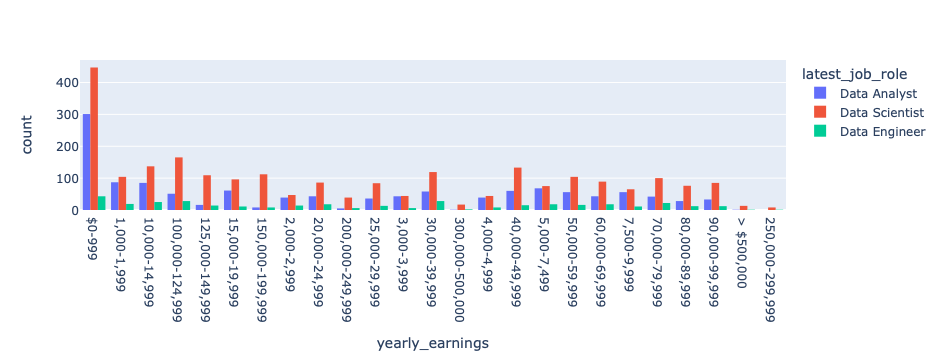

In [61]:
fig = px.histogram(big3, x='yearly_earnings', hover_data=df.columns, color='latest_job_role', barmode='group')
fig.show()

### 2. Plot

Your stakeholder wants to know the gender distribution in the countries where most people participated in the survey. He is interested in the top 10 countries.
And in the top 10 countries with the most number of female survey participants.


In [31]:
#matplotlib

In [88]:
countries = df['county_residence'].value_counts()
nrcount = countries.head(10)

In [66]:
print(nrcount)

India                                                   5851
United States of America                                2237
Other                                                   1388
Brazil                                                   694
Japan                                                    638
Russia                                                   582
United Kingdom of Great Britain and Northern Ireland     489
Nigeria                                                  476
China                                                    474
Germany                                                  404
Name: county_residence, dtype: int64


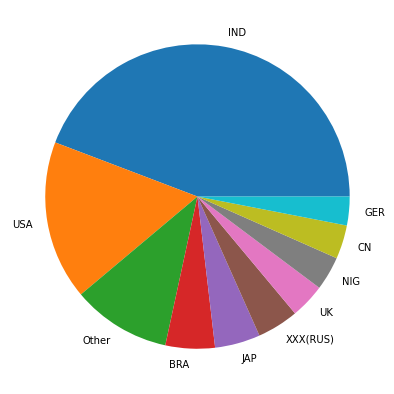

In [76]:
fig = plt.figure(figsize =(10, 7))
plt.pie(nrcount, labels= ['IND', 'USA', 'Other', 'BRA', 'JAP', 'XXX(RUS)', 'UK', 'NIG', 'CN', 'GER'])
 
# show plot
plt.show()

In [102]:
countries2 = df[['county_residence', 'gender']].copy()

In [103]:
print(countries2)


                                        county_residence gender
0                                               Colombia    Man
1                               United States of America    Man
2                                              Argentina    Man
3                               United States of America    Man
4                                                  Japan    Man
...                                                  ...    ...
20031                                             Turkey    Man
20032  United Kingdom of Great Britain and Northern I...  Woman
20033                                             Brazil    Man
20034                                              India    Man
20035                                           Pakistan    Man

[20036 rows x 2 columns]


In [112]:
countries3=countries2.loc[df['county_residence'].isin(['India', 'United Sates of America', 'Other'])]

In [113]:
by_cat_gen = countries3.groupby(['county_residence','gender'])

<AxesSubplot:ylabel='county_residence,gender'>

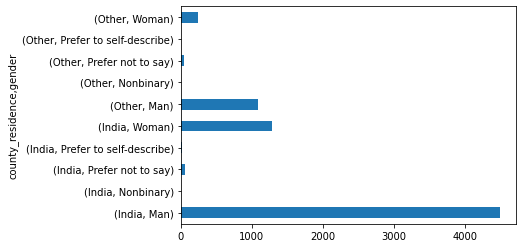

In [114]:
by_cat_gen.size().plot(kind='barh')

### 3. Plot

According to the study, aspiring Data Scientists are most often recommended to learn Python. Since Python is widely known in the stakeholder's company, he would like to know which language is most recommended after Python. He also suspects that there might be a difference in recommended languages depending on the title of the survey participant's current role and he wants to know what people with the job title "Data Scientist", "Data Analyst", and "Data Engineer" recommend. Can you confirm or reject his assumption with a/some suitable plot(s)?

In [ ]:
# seaborn

### Extra 

Now its up to you. If you're still motivated have another look at the data. What do you think is interesting or maybe different than expected?